# Infer stats
In this part we will be validating each feature with the target feature to see if their it's any connection between them

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# functions that allows our personalize functions
from helpers.helper_functions import chi_square_test_results, split_dataset, qq_plot_verification_groups, dependent_variables_test

# ignoring some warning for a better readability
import warnings
warnings.filterwarnings("ignore", message="Ignoring `palette` because no `hue` variable has been assigned.")
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.")

In [2]:
custom_colors = ['#36CE8A', "#7436F5", "#3736F4", "#36AEF5", "#B336F5", "#f8165e", "#36709A",  "#3672F5", "#7ACE5D"]
color_palette_custom  = sns.set_palette(custom_colors)
theme_color = sns.color_palette(color_palette_custom, 9)

theme_color

[(0.21176470588235294, 0.807843137254902, 0.5411764705882353),
 (0.4549019607843137, 0.21176470588235294, 0.9607843137254902),
 (0.21568627450980393, 0.21176470588235294, 0.9568627450980393),
 (0.21176470588235294, 0.6823529411764706, 0.9607843137254902),
 (0.7019607843137254, 0.21176470588235294, 0.9607843137254902),
 (0.9725490196078431, 0.08627450980392157, 0.3686274509803922),
 (0.21176470588235294, 0.4392156862745098, 0.6039215686274509),
 (0.21176470588235294, 0.4470588235294118, 0.9607843137254902),
 (0.47843137254901963, 0.807843137254902, 0.36470588235294116)]

In [3]:
# Load your dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# split the dataset
independent_var = df.iloc[:,1:11]
dependent_var = df.iloc[:,11:]

# split the dataset
X_train, X_validation, X_test, y_train, y_validation, y_test = split_dataset(
    dependent_variable= dependent_var,
    independent_variable= independent_var,
    split_train_validation = 0.15,
    split_validation_test = 0.5, 
    state_reproducibility = 100
)

# join the train dataset
train_data = pd.concat([X_train, y_train], axis = 1)
train_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
750,Male,2.0,0,0,No,children,Rural,73.62,20.8,Unknown,0
2561,Female,63.0,0,0,Yes,Private,Rural,78.96,28.6,never smoked,0
2790,Male,10.0,0,0,No,children,Rural,68.94,18.0,Unknown,0
2929,Male,4.0,0,0,No,children,Urban,103.34,18.8,Unknown,0
1694,Female,44.0,0,0,Yes,Govt_job,Urban,67.06,35.5,never smoked,0


We will take out some rows that will not be necessary for the models, because there it's just a single value and this could generate an error.

In [4]:
# delete the rows that are not necessary
train_data = train_data[train_data["gender"] != "Other"]
train_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
750,Male,2.0,0,0,No,children,Rural,73.62,20.8,Unknown,0
2561,Female,63.0,0,0,Yes,Private,Rural,78.96,28.6,never smoked,0
2790,Male,10.0,0,0,No,children,Rural,68.94,18.0,Unknown,0
2929,Male,4.0,0,0,No,children,Urban,103.34,18.8,Unknown,0
1694,Female,44.0,0,0,Yes,Govt_job,Urban,67.06,35.5,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
4149,Female,81.0,1,1,Yes,Self-employed,Urban,59.11,20.7,formerly smoked,0
1890,Female,44.0,0,0,Yes,Govt_job,Urban,91.21,24.1,never smoked,0
350,Female,79.0,1,1,Yes,Self-employed,Urban,200.28,30.0,formerly smoked,0
79,Male,43.0,0,0,Yes,Self-employed,Urban,143.43,45.9,Unknown,1


We had several columns that we need to verify with the target variable

for example some of the categorical variables we will be using the Chi square test
- gender
- hypertension
- heart_disease
- ever_married
- work_type
- Residence_type
- smoking_status


# Is there a significant association between one or more categorical variables and the likelihood of having a stroke

- **Null Hypothesis (H0):** There is an association between stroke and the other categories, so they are independent

- **Alternative Hypothesis (H1):** There is no significant relationship between stroke and the other categories, so they are dependent

For the significant level we will be using 5% as our threshold

But before applying the test we will be verifying the assumptions
- We had both categories as categorical variables
- Also, because each row represent an independent case, we can assume that the observations are independent
- Furthermore, each value inside the contingency table would be mutually exclusive, meaning that the same value can only be in 1 place inside the table




In [5]:
# variables for columns names
independent_var = "gender"
dependent_var =  "stroke"

# apply the test
proportion, expected_vals, chi2, p, dof, result = chi_square_test_results(dataset = train_data,
                                                                        independent_var= independent_var,
                                                                        dependent_var= dependent_var,
                                                                        alpha=0.05)
print(f"Association between {independent_var} and {dependent_var}")
print(result)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
proportion

Association between gender and stroke
Fail to reject the null hypothesis. There is no significant relationship between stroke and gender, so they are dependent
Chi-square statistic: 0.39581554365013777
p-value: 0.5292582356311608
Degrees of freedom: 1


stroke,0,1
gender,,
Female,2438,120
Male,1692,92


In [6]:
# variables for columns names
independent_var = "hypertension"
dependent_var =  "stroke"

# apply the test
proportion, expected_vals, chi2, p, dof, result = chi_square_test_results(dataset = train_data,
                                                                        independent_var= independent_var,
                                                                        dependent_var= dependent_var,
                                                                        alpha=0.05)
print(f"Association between {independent_var} and {dependent_var}")
print(result)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
proportion

Association between hypertension and stroke
Reject the null hypothesis. There is an association between stroke and hypertension, so they are independent
Chi-square statistic: 60.24206565795139
p-value: 8.388027337848255e-15
Degrees of freedom: 1


stroke,0,1
hypertension,,
0,3770,159
1,360,53


In this case we could try to skip this variable in some testing models to see if we could get improvement in the  performance of the models

In [7]:
# variables for columns names
independent_var = "heart_disease"
dependent_var =  "stroke"

# apply the test
proportion, expected_vals, chi2, p, dof, result = chi_square_test_results(dataset = train_data,
                                                                        independent_var= independent_var,
                                                                        dependent_var= dependent_var,
                                                                        alpha=0.05)
print(f"Association between {independent_var} and {dependent_var}")
print(result)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
proportion

Association between heart_disease and stroke
Reject the null hypothesis. There is an association between stroke and heart_disease, so they are independent
Chi-square statistic: 55.9184113237968
p-value: 7.554179668967553e-14
Degrees of freedom: 1


stroke,0,1
heart_disease,,
0,3931,176
1,199,36


In this case we could try to skip this variable in some testing models to see if we could get improvement in the  performance of the models

In [8]:
# variables for columns names
independent_var = "ever_married"
dependent_var =  "stroke"

# apply the test
proportion, expected_vals, chi2, p, dof, result = chi_square_test_results(dataset = train_data,
                                                                        independent_var= independent_var,
                                                                        dependent_var= dependent_var,
                                                                        alpha=0.05)
print(f"Association between {independent_var} and {dependent_var}")
print(result)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
proportion

Association between ever_married and stroke
Reject the null hypothesis. There is an association between stroke and ever_married, so they are independent
Chi-square statistic: 47.73845018893725
p-value: 4.8704510715677606e-12
Degrees of freedom: 1


stroke,0,1
ever_married,,
No,1472,26
Yes,2658,186


In this case we could try to skip this variable in some testing models to see if we could get improvement in the  performance of the models

In [9]:
# variables for columns names
independent_var = "work_type"
dependent_var =  "stroke"

# apply the test
proportion, expected_vals, chi2, p, dof, result = chi_square_test_results(dataset = train_data,
                                                                        independent_var= independent_var,
                                                                        dependent_var= dependent_var,
                                                                        alpha=0.05)
print(f"Association between {independent_var} and {dependent_var}")
print(result)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
proportion

Association between work_type and stroke
Reject the null hypothesis. There is an association between stroke and work_type, so they are independent
Chi-square statistic: 40.5222478525913
p-value: 3.375140843780813e-08
Degrees of freedom: 4


stroke,0,1
work_type,,
Govt_job,513,28
Never_worked,16,0
Private,2373,130
Self-employed,644,53
children,584,1


In this case we could try to skip this variable in some testing models to see if we could get improvement in the  performance of the models

In [10]:
# variables for columns names
independent_var = "Residence_type"
dependent_var =  "stroke"

# apply the test
proportion, expected_vals, chi2, p, dof, result = chi_square_test_results(dataset = train_data,
                                                                        independent_var= independent_var,
                                                                        dependent_var= dependent_var,
                                                                        alpha=0.05)
print(f"Association between {independent_var} and {dependent_var}")
print(result)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
proportion

Association between Residence_type and stroke
Fail to reject the null hypothesis. There is no significant relationship between stroke and Residence_type, so they are dependent
Chi-square statistic: 3.4472661249712795
p-value: 0.06335648364514308
Degrees of freedom: 1


stroke,0,1
Residence_type,,
Rural,2053,91
Urban,2077,121


In [11]:
# variables for columns names
independent_var = "smoking_status"
dependent_var =  "stroke"

# apply the test
proportion, expected_vals, chi2, p, dof, result = chi_square_test_results(dataset = train_data,
                                                                        independent_var= independent_var,
                                                                        dependent_var= dependent_var,
                                                                        alpha=0.05)
print(f"Association between {independent_var} and {dependent_var}")
print(result)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
proportion

Association between smoking_status and stroke
Reject the null hypothesis. There is an association between stroke and smoking_status, so they are independent
Chi-square statistic: 29.868238775313646
p-value: 1.4709944659104748e-06
Degrees of freedom: 3


stroke,0,1
smoking_status,,
Unknown,1269,39
formerly smoked,691,63
never smoked,1529,76
smokes,641,34


In this case we could try to skip this variable in some testing models to see if we could get improvement in the  performance of the models

In this situation we will be validated this 3 numerical variables
- age
- avg_glucose_level
- bmi

# Is there a significant association between one or more numerical variables and the likelihood of having a stroke

- **Null Hypothesis (H0):** The mean numeric features who have had a stroke are equal to the mean age of individuals who have not had a stroke

$$ \[ H_0: \mu_{\text{stroke}} = \mu_{\text{no-stroke}} \] $$

- **Alternative Hypothesis (HA):** The mean numeric features of individuals who have had a stroke is less than the mean of numeric features of individuals who have not had a stroke.

$$ \[ H_A: \mu_{\text{stroke}} \neq \mu_{\text{no-stroke}} \] $$ 

For the significant level we will be using 5% as our threshold

But before applying the test we will be verifying the assumptions




### Verifying for the age

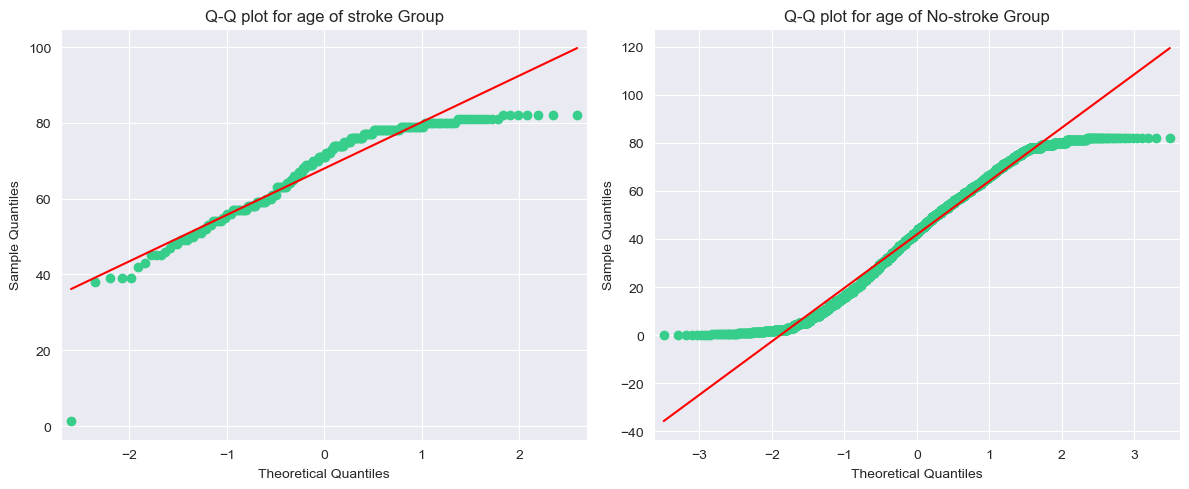

In [12]:
dependent_var = "stroke"
independent_var = "age"

a_group = train_data[train_data[dependent_var] == 1][independent_var]
b_group = train_data[train_data[dependent_var] == 0][independent_var]

qq_plot_verification_groups(
    dataset_a= a_group,
    dataset_b= b_group,
    independent_var= independent_var,
    dependent_var= dependent_var) 


We could see some normality in the stroke but in the no stroke we see that in the edge could look as it's not normally distributed.

In [13]:
dependent_variables_test(dataset_a= a_group,
                        dataset_b = b_group)

=====Shapiro-Wilk test=====
Shapiro-Wilk test for dataset A: p-value = 0.0000, dataset B: p-value = 0.0000, implies that it's not normally distributed
=====Levene’s test=====
Levene’s test for inequality of variances: p-value= 0.0000, there is heterogeneity meaning a significant difference across the groups being compared
=====Mann-Whitney U test=====
t-statistic: 16.96326007229339, p-value: 1.5291729996433796e-62


We can see that the p-values its below of the significance level, so we reject the null hypothesis meaning that both values could have different distributions as we can see in the plot below

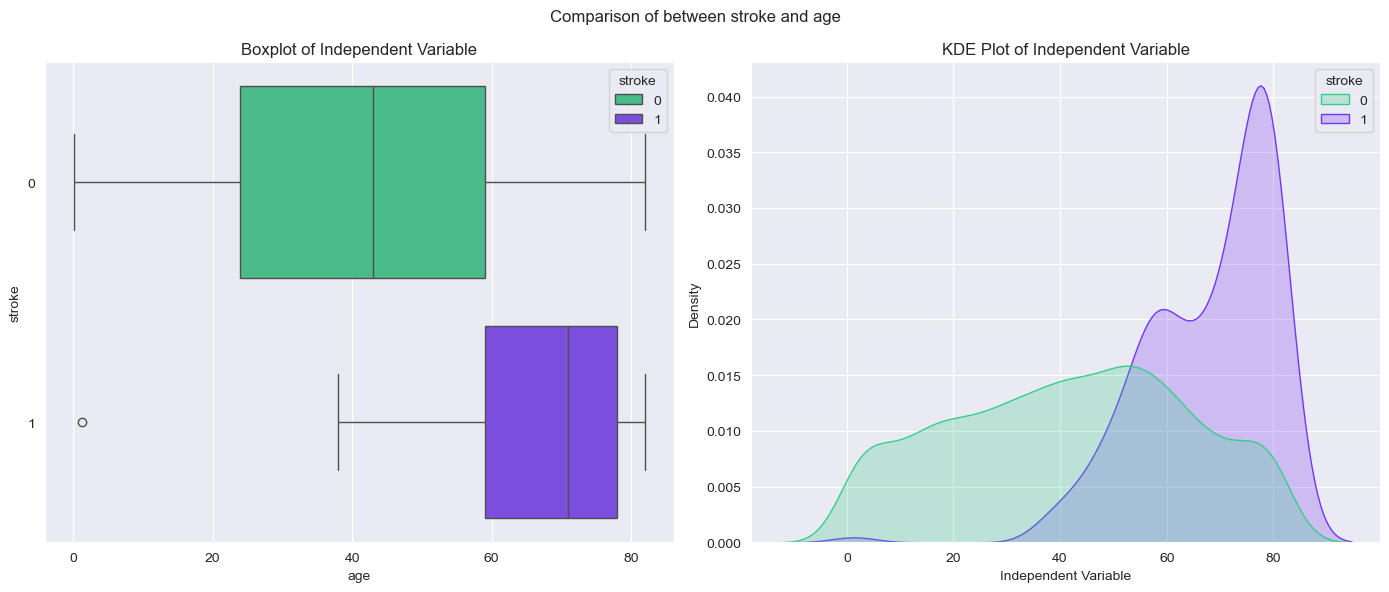

In [14]:
# Create a grid of two charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle(f'Comparison of between {dependent_var} and {independent_var}')

# Plot boxplot on the left chart
sns.boxplot(data=train_data, y=dependent_var, x=independent_var, ax=axes[0],  orient='h', hue=dependent_var)
axes[0].set_title('Boxplot of Independent Variable')

# Plot KDE plot on the right chart
sns.kdeplot(data=train_data, x=independent_var, hue=dependent_var, fill=True, common_norm=False, ax=axes[1])
axes[1].set_title('KDE Plot of Independent Variable')
axes[1].set_xlabel('Independent Variable')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

### Verifying for the avg glucose level

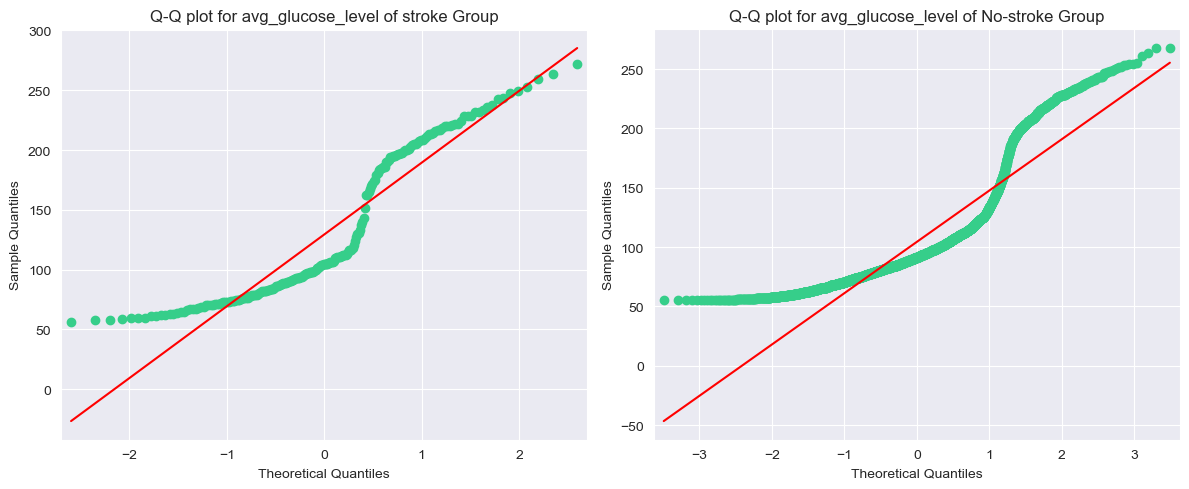

In [15]:
dependent_var = "stroke"
independent_var = "avg_glucose_level"

a_group = train_data[train_data[dependent_var] == 1][independent_var]
b_group = train_data[train_data[dependent_var] == 0][independent_var]

qq_plot_verification_groups(
    dataset_a= a_group,
    dataset_b= b_group,
    independent_var= independent_var,
    dependent_var= dependent_var) 


We could see that this it's not normally distributed as the qq plot it's not compliantly line in the center

In [16]:
dependent_variables_test(dataset_a= a_group,
                        dataset_b = b_group)

=====Shapiro-Wilk test=====
Shapiro-Wilk test for dataset A: p-value = 0.0000, dataset B: p-value = 0.0000, implies that it's not normally distributed
=====Levene’s test=====
Levene’s test for inequality of variances: p-value= 0.0000, there is heterogeneity meaning a significant difference across the groups being compared
=====Mann-Whitney U test=====
t-statistic: 7.996485191340564, p-value: 1.62828834787938e-15


We can see that the p-values its below of the significance level, so we reject the null hypothesis meaning that both values could have different distributions as we can see in the plot below

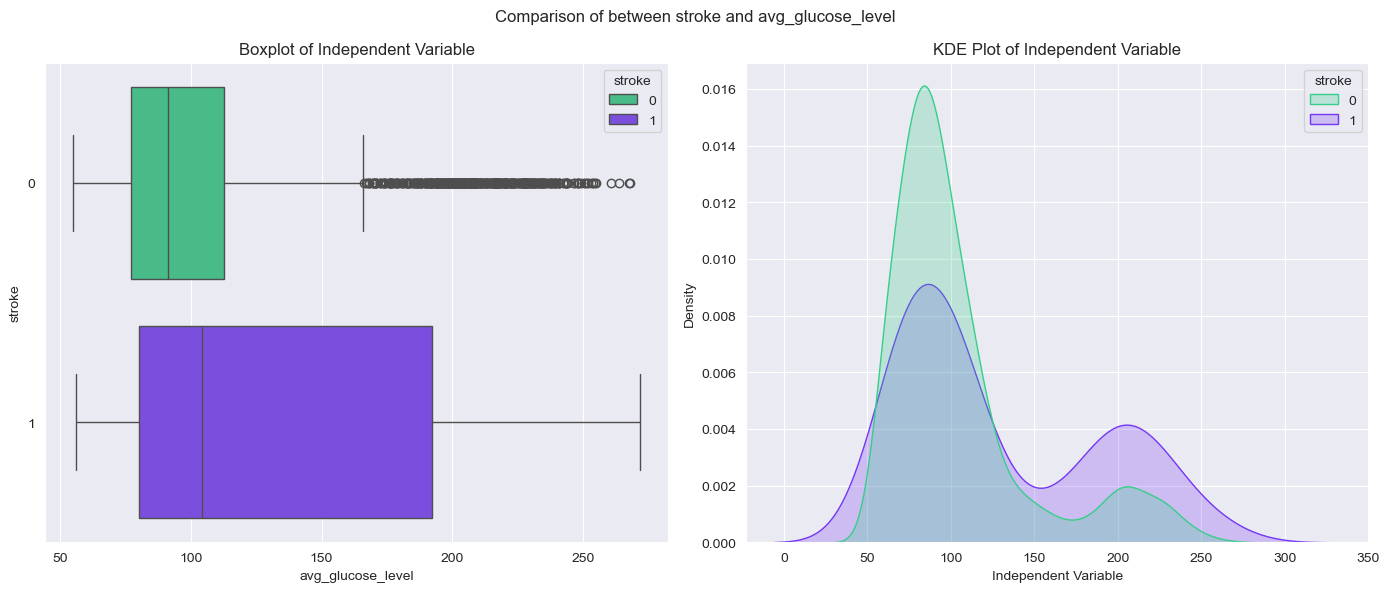

In [17]:
# Create a grid of two charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle(f'Comparison of between {dependent_var} and {independent_var}')

# Plot boxplot on the left chart
sns.boxplot(data=train_data, y=dependent_var, x=independent_var, ax=axes[0],  orient='h', hue=dependent_var)
axes[0].set_title('Boxplot of Independent Variable')

# Plot KDE plot on the right chart
sns.kdeplot(data=train_data, x=independent_var, hue=dependent_var, fill=True, common_norm=False, ax=axes[1])
axes[1].set_title('KDE Plot of Independent Variable')
axes[1].set_xlabel('Independent Variable')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

### Verifying for the BMI

In [18]:
# filling the missing values
train_data["bmi"].fillna(train_data["bmi"].mean(), inplace = True)

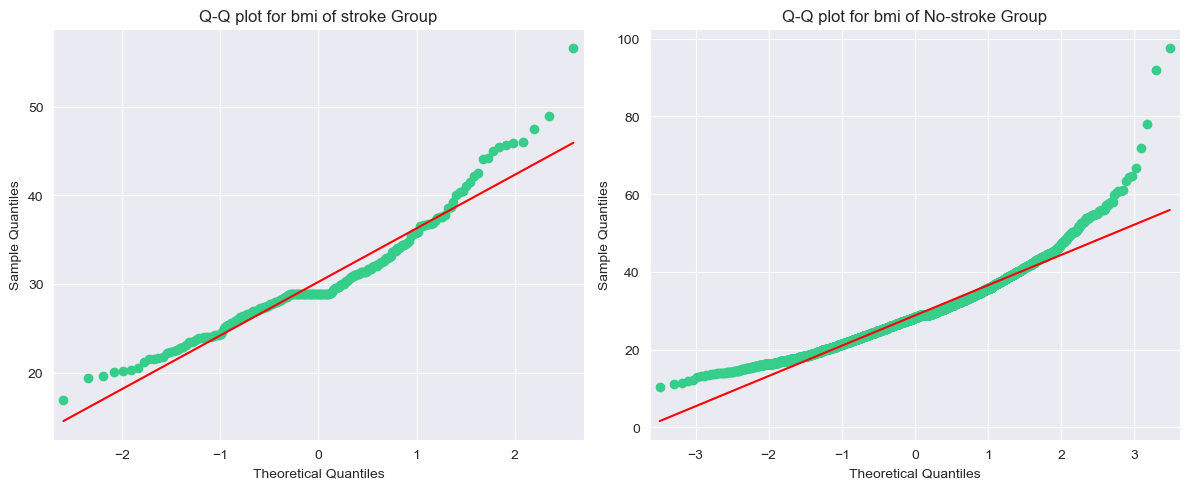

In [19]:
dependent_var = "stroke"
independent_var = "bmi"

a_group = train_data[train_data[dependent_var] == 1][independent_var]
b_group = train_data[train_data[dependent_var] == 0][independent_var]

qq_plot_verification_groups(
    dataset_a= a_group,
    dataset_b= b_group,
    independent_var= independent_var,
    dependent_var= dependent_var) 


Seems that the distributions It's not normally distributed.

In [20]:
dependent_variables_test(dataset_a= a_group,
                        dataset_b = b_group)

=====Shapiro-Wilk test=====
Shapiro-Wilk test for dataset A: p-value = 0.0000, dataset B: p-value = 0.0000, implies that it's not normally distributed
=====Levene’s test=====
Levene’s test for inequality of variances: p-value= 0.0000, there is heterogeneity meaning a significant difference across the groups being compared
=====Mann-Whitney U test=====
t-statistic: 2.6475934677287283, p-value: 0.008136007031320783


We can see that the p-values its below of the significance level, so we reject the null hypothesis meaning that both values could have different distributions as we can see in the plot below

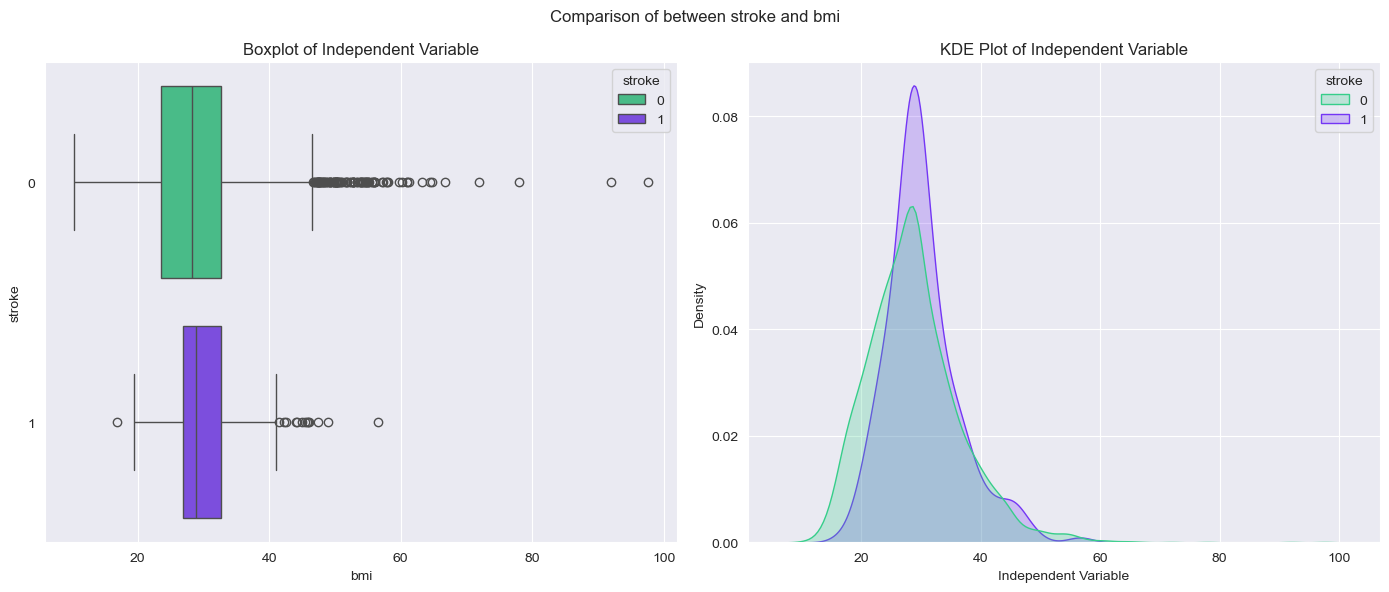

In [21]:
# Create a grid of two charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle(f'Comparison of between {dependent_var} and {independent_var}')

# Plot boxplot on the left chart
sns.boxplot(data=train_data, y=dependent_var, x=independent_var, ax=axes[0],  orient='h', hue=dependent_var)
axes[0].set_title('Boxplot of Independent Variable')

# Plot KDE plot on the right chart
sns.kdeplot(data=train_data, x=independent_var, hue=dependent_var, fill=True, common_norm=False, ax=axes[1])
axes[1].set_title('KDE Plot of Independent Variable')
axes[1].set_xlabel('Independent Variable')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# Conclusion
- We can say that there is no association between **hypertension, heart_disease, ever_married, work_type and smoking_status** 
meaning that this feature could not be helpful at the time to predict the target variable
- We could see that both values in the both circumstances could have a different distribution when we compared BMI, age
and glucose levels to if they had a stroke, so we could expect that we will be using this features for the predictive models
